In [1]:
from PIL import Image
import numpy as np
from IPython.display import Image as IPImage
import math
from skimage import io, color
import csv
import matplotlib.pyplot as plt

In [2]:
location = "train/"

#z = 200
block =768  #number of blocks
offset = 768/block
nn = block
n = nn*nn

In [13]:
with open("samples.csv", "r") as f:
    reader = csv.reader(f)
    samples = list(reader)
print(samples)

[['0a00a69de.jpg', '1'], ['0a0119288.jpg', '1'], ['0a01d8321.jpg', '1'], ['0a022b4aa.jpg', '1'], ['0a0272bad.jpg', '1'], ['0a087cb2f.jpg', '1'], ['0a0980693.jpg', '1'], ['0a0aeea56.jpg', '1'], ['0a0bc9b17.jpg', '1'], ['0a0c7f8d1.jpg', '1'], ['0a0cdca85.jpg', '1'], ['0a0d2d44e.jpg', '1'], ['0a0dc11e4.jpg', '1'], ['0a0e44e37.jpg', '1'], ['0a0e7a366.jpg', '1'], ['0a0f45639.jpg', '1'], ['0a12274c2.jpg', '1'], ['0a128e735.jpg', '1'], ['0a12c8a35.jpg', '1'], ['0a12e3118.jpg', '1'], ['0a143e5f6.jpg', '1'], ['0a148697c.jpg', '0'], ['0a15f8996.jpg', '0'], ['0a16278cd.jpg', '1'], ['0a16aee48.jpg', '1'], ['0a18f6228.jpg', '1'], ['0a1a58833.jpg', '0'], ['0a1a7f395.jpg', '0'], ['0a1a934e8.jpg', '1'], ['0a1ab45a9.jpg', '1'], ['0a1ae79f1.jpg', '1'], ['0a1b3b5e1.jpg', '1'], ['0a1b86392.jpg', '0'], ['0a1c2850b.jpg', '1'], ['0a1c46970.jpg', '1'], ['0a1d24252.jpg', '1'], ['0a1d3fd88.jpg', '1'], ['0a1d87989.jpg', '0'], ['0a1da498d.jpg', '1'], ['0a1e3433f.jpg', '1'], ['0a1e36c79.jpg', '1'], ['0a1ea1af4.jpg

# RGB

In [14]:
count = 0
count2 = 0
data = [np.zeros(0), np.zeros(0)]
data2 = [np.zeros(0), np.zeros(0)]
data3 = [np.zeros(0), np.zeros(0)]


for file in samples:
    filename = file[0]
    sea = int(file[1])
    img = Image.open(location + filename) #open image
    title = ["SHIP", "SEA"]
    print("Filename: %s -- %s" % (filename, title[sea]))

    ##read color channels into array 0:RED, 1:GREEN, 2:BLUE
    colors = [np.array(img.getdata(0)).reshape(768,768), np.array(img.getdata(1)).reshape(768,768), np.array(img.getdata(2)).reshape(768,768)]
    
    ##calculate the average values
    ##mean=[np.average(colors[0]), np.average(colors[1]), np.average(colors[2])]
    ##print("Average value of red: %.2f, green: %.2f, blue:%.2f" % (mean[0], mean[1], mean[2]))

    ##calculate the standard deviation
    std=[np.std(colors[0]), np.std(colors[1]), np.std(colors[2])]
    #print("Standard deviation of red: %.2f, green: %.2f, blue:%.2f" % (std[0], std[1], std[2]))
    
    if(sea == 0 and np.max(std) < 5):
        count = count + 1
    
    if(sea == 1 and np.max(std) < 5):
        count2 = count2 + 1
    
    data[sea] = np.append(data[sea],np.max(std))
    
    #print("min: %.3f, max: %.3f -- %s" %(np.min(std), np.max(std), title[sea]))
    
    #check if block size is pixel
    if block != 768:
        submean = [np.zeros(n).reshape(block,block), np.zeros(n).reshape(block,block), np.zeros(n).reshape(block,block)]

        for x in range(0,block):
            for y in range(0,block):
                for i in range(0,3):
                    submean[i][x,y] = np.average(colors[i][x:x+offset,y:y+offset])
    
    minmax = np.zeros(0)
    
    for i in range(0,3):
        if block == 768:
            toProcess = colors[i]
        else:
            toProcess = submean[i]
        avg = np.average(toProcess)
        std = np.std(toProcess)
        dmin = np.min(toProcess)
        dmax = np.max(toProcess)
        minmax = np.append(minmax, (avg-dmin)*nn/std)
        minmax = np.append(minmax, (dmax-avg)*nn/std)
    
    data3[sea] = np.append(data3[sea],np.max(minmax))
    
    print("-----------------------------------------------------------")  

Filename: 0a00a69de.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0119288.jpg -- SEA
-----------------------------------------------------------
Filename: 0a01d8321.jpg -- SEA
-----------------------------------------------------------
Filename: 0a022b4aa.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0272bad.jpg -- SEA
-----------------------------------------------------------
Filename: 0a087cb2f.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0980693.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0aeea56.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0bc9b17.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0c7f8d1.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0cdca85.jpg -- SEA
-----------------------------------------------------------

-----------------------------------------------------------
Filename: 0a430f5f4.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a4318411.jpg -- SEA
-----------------------------------------------------------
Filename: 0a460dfc5.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a466261a.jpg -- SEA
-----------------------------------------------------------
Filename: 0a467e92a.jpg -- SEA
-----------------------------------------------------------
Filename: 0a474030e.jpg -- SEA
-----------------------------------------------------------
Filename: 0a4756aec.jpg -- SEA
-----------------------------------------------------------
Filename: 0a483df33.jpg -- SEA
-----------------------------------------------------------
Filename: 0a4864b49.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a48d79f2.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a49aa6eb.jpg --

-----------------------------------------------------------
Filename: 0a7a0fa38.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a7a257fc.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7b289e5.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a7c37496.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7c8e4a1.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7d1c8c0.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7f2fe3f.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7f650ee.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a800c747.jpg -- SEA
-----------------------------------------------------------
Filename: 0a8084944.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a80adac6.jpg --

-----------------------------------------------------------
Filename: 0aaa2cccf.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa32c39.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa4eab0.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa5cfa9.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaaaeec6.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab6cdcc.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aab6e18c.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab77784.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aab89671.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab95dbc.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aac3bff3.jpg -- 

-----------------------------------------------------------
Filename: 0ad7a32a8.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7aa272.jpg -- SHIP
-----------------------------------------------------------
Filename: 0ad7ad6c2.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7bf0f4.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7c1e0b.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7c2758.jpg -- SHIP
-----------------------------------------------------------
Filename: 0ad88eee9.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad95cd82.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad9997fb.jpg -- SEA
-----------------------------------------------------------
Filename: 0ada123aa.jpg -- SEA
-----------------------------------------------------------
Filename: 0adb9bc50.jpg -- S

# LAB

In [15]:
count = 0
count2 = 0
data = [np.zeros(0), np.zeros(0)]
data2 = [np.zeros(0), np.zeros(0)]
data3 = [np.zeros(0), np.zeros(0)]

for file in samples:
    filename = file[0]
    sea = int(file[1])
    img = Image.open(location + filename) #open image
    title = ["SHIP", "SEA"]
    print("Filename: %s -- %s" % (filename, title[sea]))

    rgb = io.imread(location + filename)
    
    lab = color.rgb2lab(rgb)
    
    colors = [np.array(lab[:,:,0]).reshape(768,768), np.array(lab[:,:,1]).reshape(768,768), np.array(lab[:,:,2]).reshape(768,768)]
    
    ##calculate the standard deviation
    std=[np.std(colors[0]), np.std(colors[1]), np.std(colors[2])]
    #print("Standard deviation of red: %.2f, green: %.2f, blue:%.2f" % (std[0], std[1], std[2]))
    
    #black and white
    data[sea] = np.append(data[sea],std[0])
    
    #print("min: %.3f, max: %.3f -- %s" %(np.min(std), np.max(std), title[sea]))
    
    #check if block size is pixel
    if block != 768:
        submean = [np.zeros(n).reshape(block,block), np.zeros(n).reshape(block,block), np.zeros(n).reshape(block,block)]

        for x in range(0,block):
            for y in range(0,block):
                for i in range(0,3):
                    submean[i][x,y] = np.average(colors[i][x:x+offset,y:y+offset])

    #black and white
    if block == 768:
        toProcess = colors[0]
    else:
        toProcess = submean[0]
    avg = np.average(toProcess)
    std = np.std(toProcess)
    dmin = np.min(toProcess)
    dmax = np.max(toProcess)
        
    a = (avg-dmin)*nn/std
    b = (dmax-avg)*nn/std
    z = max(a, b)
    data2[sea] = np.append(data2[sea],z)
    
    #colors
    minmax = np.zeros(0)
    
    for i in range(1,3):
        if block == 768:
            toProcess = colors[i]
        else:
            toProcess = submean[i]
        avg = np.average(toProcess)
        std = np.std(toProcess)
        dmin = np.min(toProcess)
        dmax = np.max(toProcess)
        minmax = np.append(minmax, (avg-dmin)*nn/std)
        minmax = np.append(minmax, (dmax-avg)*nn/std)
    
    z = np.max(minmax)
    
    data3[sea] = np.append(data3[sea],z)
    
    print("-----------------------------------------------------------")

Filename: 0a00a69de.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0119288.jpg -- SEA
-----------------------------------------------------------
Filename: 0a01d8321.jpg -- SEA
-----------------------------------------------------------
Filename: 0a022b4aa.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0272bad.jpg -- SEA
-----------------------------------------------------------
Filename: 0a087cb2f.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0980693.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0aeea56.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0bc9b17.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0c7f8d1.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0cdca85.jpg -- SEA
-----------------------------------------------------------

-----------------------------------------------------------
Filename: 0a430f5f4.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a4318411.jpg -- SEA
-----------------------------------------------------------
Filename: 0a460dfc5.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a466261a.jpg -- SEA
-----------------------------------------------------------
Filename: 0a467e92a.jpg -- SEA
-----------------------------------------------------------
Filename: 0a474030e.jpg -- SEA
-----------------------------------------------------------
Filename: 0a4756aec.jpg -- SEA
-----------------------------------------------------------
Filename: 0a483df33.jpg -- SEA
-----------------------------------------------------------
Filename: 0a4864b49.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a48d79f2.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a49aa6eb.jpg --

-----------------------------------------------------------
Filename: 0a7a0fa38.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a7a257fc.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7b289e5.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a7c37496.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7c8e4a1.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7d1c8c0.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7f2fe3f.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7f650ee.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a800c747.jpg -- SEA
-----------------------------------------------------------
Filename: 0a8084944.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a80adac6.jpg --

-----------------------------------------------------------
Filename: 0aaa2cccf.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa32c39.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa4eab0.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa5cfa9.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaaaeec6.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab6cdcc.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aab6e18c.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab77784.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aab89671.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab95dbc.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aac3bff3.jpg -- 

-----------------------------------------------------------
Filename: 0ad7a32a8.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7aa272.jpg -- SHIP
-----------------------------------------------------------
Filename: 0ad7ad6c2.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7bf0f4.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7c1e0b.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7c2758.jpg -- SHIP
-----------------------------------------------------------
Filename: 0ad88eee9.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad95cd82.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad9997fb.jpg -- SEA
-----------------------------------------------------------
Filename: 0ada123aa.jpg -- SEA
-----------------------------------------------------------
Filename: 0adb9bc50.jpg -- S

# Visualize limits

In [16]:
title = ["SHIP", "SEA"]
threshold = 1000

for file in samples:
    filename = file[0]
    sea = int(file[1])
    img = Image.open(location + filename) #open image
    print("Filename: %s -- %s" % (filename, title[sea]))

    rgb = io.imread(location + filename)
    
    lab = color.rgb2lab(rgb)
    
    luminescence = np.array(lab[:,:,0])
    
    sorted = np.sort(luminescence.flatten())
    threshold_down = sorted[threshold]
    threshold_up = sorted[-threshold]
    #mono = np.zeros((768, 768, 3), dtype="bool")
    mono = np.full((768, 768, 3), 200, dtype=np.uint8)
              
    for x in range (0,768):
        for y in range (0,768):
            if(luminescence[x][y] > threshold_up):
                mono[x][y] = [255, 255, 255] 
            if(luminescence[x][y] < threshold_down):
                mono[x][y] = [0, 0, 0] 
    
    img = Image.fromarray(mono, 'RGB')
    img.save(filename[0:9] + '_' + title[sea] + '.png')
    print("-----------------------------------------------------------")

Filename: 0a00a69de.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0119288.jpg -- SEA
-----------------------------------------------------------
Filename: 0a01d8321.jpg -- SEA
-----------------------------------------------------------
Filename: 0a022b4aa.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0272bad.jpg -- SEA
-----------------------------------------------------------
Filename: 0a087cb2f.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0980693.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0aeea56.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0bc9b17.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0c7f8d1.jpg -- SEA
-----------------------------------------------------------
Filename: 0a0cdca85.jpg -- SEA
-----------------------------------------------------------

-----------------------------------------------------------
Filename: 0a430f5f4.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a4318411.jpg -- SEA
-----------------------------------------------------------
Filename: 0a460dfc5.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a466261a.jpg -- SEA
-----------------------------------------------------------
Filename: 0a467e92a.jpg -- SEA
-----------------------------------------------------------
Filename: 0a474030e.jpg -- SEA
-----------------------------------------------------------
Filename: 0a4756aec.jpg -- SEA
-----------------------------------------------------------
Filename: 0a483df33.jpg -- SEA
-----------------------------------------------------------
Filename: 0a4864b49.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a48d79f2.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a49aa6eb.jpg --

-----------------------------------------------------------
Filename: 0a7a0fa38.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a7a257fc.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7b289e5.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a7c37496.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7c8e4a1.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7d1c8c0.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7f2fe3f.jpg -- SEA
-----------------------------------------------------------
Filename: 0a7f650ee.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a800c747.jpg -- SEA
-----------------------------------------------------------
Filename: 0a8084944.jpg -- SHIP
-----------------------------------------------------------
Filename: 0a80adac6.jpg --

-----------------------------------------------------------
Filename: 0aaa2cccf.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa32c39.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa4eab0.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaa5cfa9.jpg -- SEA
-----------------------------------------------------------
Filename: 0aaaaeec6.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab6cdcc.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aab6e18c.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab77784.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aab89671.jpg -- SEA
-----------------------------------------------------------
Filename: 0aab95dbc.jpg -- SHIP
-----------------------------------------------------------
Filename: 0aac3bff3.jpg -- 

-----------------------------------------------------------
Filename: 0ad7a32a8.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7aa272.jpg -- SHIP
-----------------------------------------------------------
Filename: 0ad7ad6c2.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7bf0f4.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7c1e0b.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad7c2758.jpg -- SHIP
-----------------------------------------------------------
Filename: 0ad88eee9.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad95cd82.jpg -- SEA
-----------------------------------------------------------
Filename: 0ad9997fb.jpg -- SEA
-----------------------------------------------------------
Filename: 0ada123aa.jpg -- SEA
-----------------------------------------------------------
Filename: 0adb9bc50.jpg -- S

# Visualize result

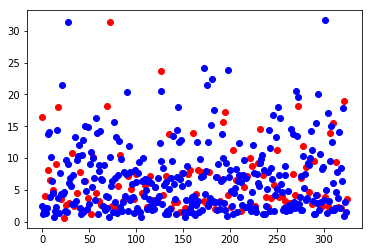

In [17]:
x = np.linspace(0,data[1].size,data[0].size)
y = np.arange(0,data[1].size)

plt.plot(x, data[0], 'ro', y, data[1], 'bo')
#plt.axis([0, 350, 0, 10])

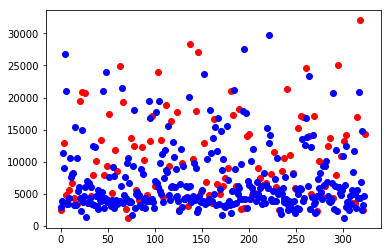

In [18]:
plt.plot(x, data2[0], 'ro', y, data2[1], 'bo')
#plt.axis([0, 350,0, 10000])

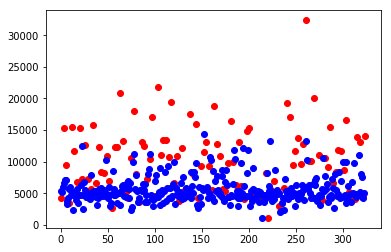

In [19]:
plt.plot(x, data3[0], 'ro', y, data3[1], 'bo')
#plt.axis([0, 350, 2000, 10000])

In [20]:
sea = 0
ship = 0

threshold = 6500
for i in data3[0]:
    if(i < threshold):
        ship = ship + 1
for i in data3[1]:
    if(i < threshold):
        sea = sea + 1

In [21]:
print("ship: %d, sea: %d" %(ship, sea))

ship: 35, sea: 256


In [22]:
print("ship: %.3f, sea: %.3f" %(float(ship)/x.size, float(sea)/y.size))

ship: 0.307, sea: 0.790


1491
1
3156
1
147
0
118
0
(True, 1491)
(True, 3156)
(False, 147)
(False, 118)


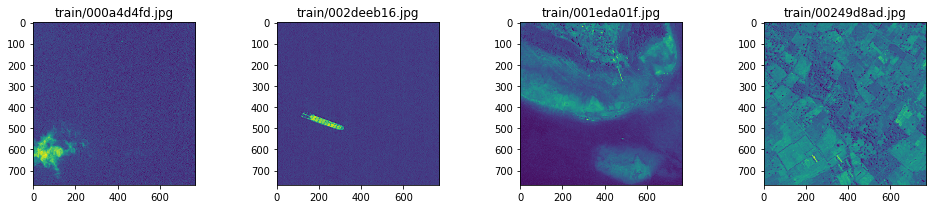

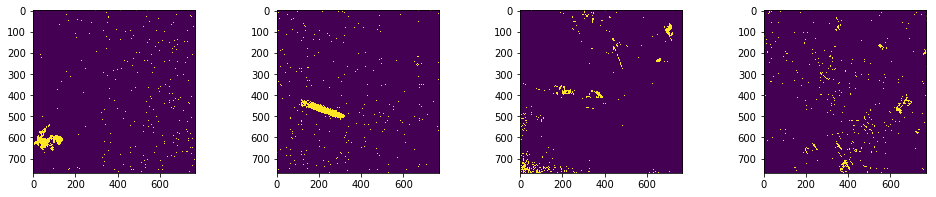

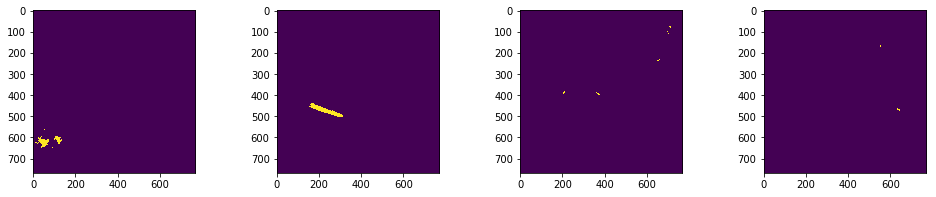

In [24]:
from PIL import Image
import numpy as np
from IPython.display import Image as IPImage
import math
from skimage import io, color
import csv
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.measurements import find_objects, label

from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.measurements import find_objects, label
def detect_object(FILEPATH, EROSION = 5, THRESHOLD = .01, SIZE = 1000):
    IMGSIZE = 768
    ia = np.ndarray([IMGSIZE,IMGSIZE])
    img = plt.imread(FILEPATH)
    lum = color.rgb2lab(img)
    for x in range(IMGSIZE):
        for y in range(IMGSIZE):
            ia[x, y] = lum[x, y, 0]
    thr_low = np.sort(ia.flat)[int(IMGSIZE*IMGSIZE*THRESHOLD)]
    thr_high = np.sort(ia.flat)[int(IMGSIZE*IMGSIZE*(1-THRESHOLD))]
    for x in range(IMGSIZE):
        for y in range(IMGSIZE):
            ia[x, y] = 1 if ia[x, y] < thr_low else 1 if ia[x, y] > thr_high else 0
    ia = binary_erosion(input=ia, iterations=EROSION)
    ia = ia.astype(int)
    ia, _ = label(ia)
    objs = find_objects(ia)
    max_size = -1
    for o in range(len(objs)):
        obj = ia[objs[o]]
        size = sum((obj != 0).flat)
        max_size = max(size, max_size)
        #print(max_size)
    return (max_size >= SIZE, max_size)
    
def detect_object_demo():
    image_names=["train/000a4d4fd.jpg", "train/002deeb16.jpg", "train/001eda01f.jpg", "train/00249d8ad.jpg"]
    n = len(image_names)
    ia = np.ndarray((n,768,768))
    plt.rcParams["figure.figsize"] = [16,9]
    fig, ax = plt.subplots(ncols=n, nrows=1)
    plt.subplots_adjust(wspace=.5)
    for i in range(len(image_names)):
        ax[i].set_title(image_names[i])
        img = plt.imread(image_names[i])
        lum = color.rgb2lab(img)
        for x in range(768):
            for y in range(768):
                ia[i, x, y] = lum[x, y, 0]
        ax[i].imshow(ia[i])
    fig, ax = plt.subplots(ncols=n, nrows=1)
    plt.subplots_adjust(wspace=.5)
    for i in range(len(image_names)):
        thr = .01
        thr_low = np.sort(ia[i].flat)[int(768*768*thr)]
        thr_high = np.sort(ia[i].flat)[int(768*768*(1-thr))]
        for x in range(768):
            for y in range(768):
                ia[i, x, y] = 1 if ia[i, x, y] < thr_low else 1 if ia[i, x, y] > thr_high else 0
        ax[i].imshow(ia[i])
    fig, ax = plt.subplots(ncols=n, nrows=1)
    plt.subplots_adjust(wspace=.5)
    for i in range(len(image_names)):
        erosion = 5
        ia[i] = binary_erosion(input=ia[i], iterations=erosion)
        ax[i].imshow(ia[i])
    from scipy.ndimage.measurements import find_objects, label
    ia = ia.astype(int)
    for i in range(len(image_names)):
        ia[i], _ = label(ia[i])
        objs = find_objects(ia[i])
        max_size = -1
        for o in range(len(objs)):
            obj = ia[i][objs[o]]
            size = sum((obj != 0).flat)
            max_size = max(size, max_size)
        print(max_size)
        size_thr = 1000
        print("1" if max_size >= size_thr else "0")

detect_object_demo()
image_names=["train/000a4d4fd.jpg", "train/002deeb16.jpg", "train/001eda01f.jpg", "train/00249d8ad.jpg"]
for f in image_names:
    print(detect_object(f))